# Use financial criteria and probability criteria to evaluate LinearRegression model 

In [1]:
# import libraries
import pandas as pd
import warnings
import sys
import os

warnings.filterwarnings("ignore") # Ignore warnings

# Get the absolute path of the `src` folder
src_path = os.path.abspath(os.path.join(os.getcwd(), "..", "src"))

# Add `src` to the system path
sys.path.insert(0, src_path)

from tests.hypothesisTest import hypothesisTest
from tests.financialTest import financialTest

## Financial Test

In [2]:
df = pd.read_csv('../data/processed/VNINDEX_add_features.csv')
in_sample_total_profit, total_trade_number, win_rate, profit_factor = financialTest(df,model='LinearRegression',feature_columns=['Net_advances','A/D','Schultz','McClellan_Oscillator'],target_column='daily_returns')
print(f'Total profit: {in_sample_total_profit}')
print(f'Total trade number: {total_trade_number}')
print(f'Win rate: {win_rate}')
print(f'Profit factor: {profit_factor}')

Finally capital:  1990867.5859561935
Total profit: -9132.414043806493
Total trade number: 2429
Win rate: 0.492383696994648
Profit factor: 0.9050236258528692


## Hypothesis Test

In [3]:
data = []
for i in range(100):
    df = pd.read_csv(f'../data/processed/out_of_sample_{i+1}.csv')
    data.append(df)
total_profit_list = hypothesisTest(data,model='LinearRegression',feature_columns=['Net_advances','A/D','Schultz','McClellan_Oscillator'],target_column='daily_returns',financial_feature='total_profit')
total_profit_list = [float(total_profit) for total_profit in total_profit_list]
print(f'Total profit list: {total_profit_list}')

Finally capital:  1985657.4678340715
Finally capital:  1993587.467277688
Finally capital:  2002194.8792706796
Finally capital:  1993907.7461658402
Finally capital:  1991266.191153289
Finally capital:  1992725.1948786825
Finally capital:  1993891.5770999715
Finally capital:  1995557.2889015605
Finally capital:  1991953.4401130863
Finally capital:  1983015.461024504
Finally capital:  2000879.6782468369
Finally capital:  1998268.0576228437
Finally capital:  1991623.879396983
Finally capital:  1986765.256265627
Finally capital:  1995933.3427806953
Finally capital:  1991373.4252907997
Finally capital:  1992190.6317937719
Finally capital:  1988729.5253819036
Finally capital:  1992616.579243113
Finally capital:  2003062.7730682634
Finally capital:  1989169.8480380257
Finally capital:  1986127.3345880012
Finally capital:  1986501.3313456732
Finally capital:  1992578.563040245
Finally capital:  1987254.0263446711
Finally capital:  1992556.189118859
Finally capital:  1994333.2376567202
Finally c

In-sample profit -9132.414 lies in the center of the distribution.
p-value: 0.640
Since p-value >= 0.1, we fail to reject H0. We can't beat that monkey.


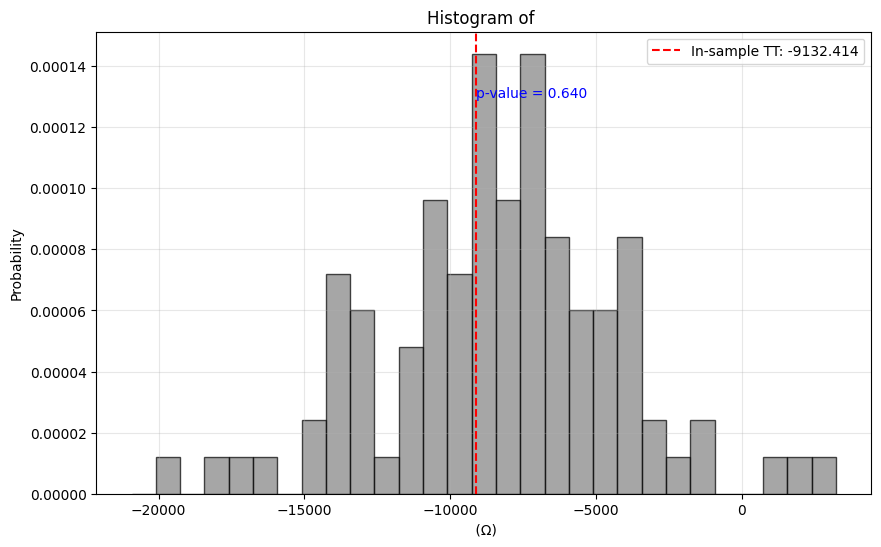

In [4]:
from visualization.histogram import plot_histogram
plot_histogram(total_profit_list,in_sample_total_profit)